In [1]:
#https://www.analyticsvidhya.com/blog/2015/06/solution-kaggle-competition-bike-sharing-demand/
#https://www.kaggle.com/c/bike-sharing-demand
#https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile
#https://www.canva.com/learn/brand-color-palette/

#https://www.kaggle.com/sudalairajkumar/simple-exploration-baseline-santander-value
#https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
#https://www.kaggle.com/jsaguiar/updated-0-792-lb-lightgbm-with-simple-features/code

In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import os;
import seaborn as sns;
%matplotlib inline

# <font color='#00281F'>1. Reading Files</font>

In [2]:
folderPath = 'D:/Rep/MyLearning/articles/24Tutorials/12_BikeSharing';

In [3]:
trainFileName = 'train.csv'
trainFilePath = os.path.join(folderPath,trainFileName)
testFileName = 'test.csv';
testFilePath = os.path.join(folderPath,testFileName);

In [4]:
train = pd.read_csv(trainFilePath);
test = pd.read_csv(testFilePath)
data = pd.concat([train,test])

In [5]:
data = data[['datetime','season','weather','workingday','holiday','temp','atemp','windspeed','humidity','casual','registered','count']]

In [6]:
data['season'] = data['season'].replace(1,'spring')
data['season'] = data['season'].replace(2,'summer')
data['season'] = data['season'].replace(3,'fall')
data['season'] = data['season'].replace(4,'winter')
train['season'] = train['season'].replace(1,'spring')
train['season'] = train['season'].replace(2,'summer')
train['season'] = train['season'].replace(3,'fall')
train['season'] = train['season'].replace(4,'winter')

In [7]:
data['weather'] = data['weather'].replace(1,'clear')
data['weather'] = data['weather'].replace(2,'cloudy')
data['weather'] = data['weather'].replace(3,'lightRain')
data['weather'] = data['weather'].replace(4,'HeavyRain')
train['weather'] = train['weather'].replace(1,'clear')
train['weather'] = train['weather'].replace(2,'cloudy')
train['weather'] = train['weather'].replace(3,'lightRain')
train['weather'] = train['weather'].replace(4,'HeavyRain')

In [8]:
data['datetime'] = pd.to_datetime(data['datetime'],format='%Y-%m-%d %H:%M:%S')
data['season'] = data['season'].astype('category')
data['weather'] = data['weather'].astype('category')
data['workingday'] = data['workingday'].astype(np.uint8)
data['holiday'] = data['holiday'].astype(np.uint8)
data['temp'] = data['temp'].astype(np.float32)
data['atemp'] = data['atemp'].astype(np.float32)
data['windspeed'] = data['windspeed'].astype(np.float32)
data['humidity'] = data['humidity'].astype(np.uint8)
#data['casual'] = data['casual'].astype(np.uint16)
#data['registered'] = data['registered'].astype(np.uint16)
#data['count'] = data['count'].astype(np.uint16)

In [9]:
train['datetime'] = pd.to_datetime(train['datetime'],format='%Y-%m-%d %H:%M:%S')
train['season'] = train['season'].astype('category')
train['weather'] = train['weather'].astype('category')
train['workingday'] = train['workingday'].astype(np.uint8)
train['holiday'] = train['holiday'].astype(np.uint8)
train['temp'] = train['temp'].astype(np.float32)
train['atemp'] = train['atemp'].astype(np.float32)
train['windspeed'] = train['windspeed'].astype(np.float32)
train['humidity'] = train['humidity'].astype(np.uint8)
train['casual'] = train['casual'].astype(np.uint16)
train['registered'] = train['registered'].astype(np.uint16)
train['count'] = train['count'].astype(np.uint16)

# <font color='#00281F'>2. Data Exploration</font> 

In [10]:
data.dtypes

datetime      datetime64[ns]
season              category
weather             category
workingday             uint8
holiday                uint8
temp                 float32
atemp                float32
windspeed            float32
humidity               uint8
casual               float64
registered           float64
count                float64
dtype: object

In [11]:
print(data.groupby('weather')['datetime'].nunique())
print('-------------------------------------------')
print(data.groupby('season')['datetime'].nunique())

weather
HeavyRain        3
clear        11413
cloudy        4544
lightRain     1419
Name: datetime, dtype: int64
-------------------------------------------
season
fall      4496
spring    4242
summer    4409
winter    4232
Name: datetime, dtype: int64


In [12]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.230619,23.655096,61.886460,12.799149,36.021955,155.552177,191.574132
std,0.166599,0.466159,7.791600,8.474654,19.245033,8.164592,49.960477,151.039033,181.144454
min,0.000000,0.000000,0.820000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,13.940000,16.665001,47.000000,7.001500,4.000000,36.000000,42.000000
50%,0.000000,1.000000,20.500000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,0.000000,1.000000,26.240000,31.059999,77.000000,16.997900,49.000000,222.000000,284.000000
max,1.000000,1.000000,41.000000,45.455002,100.000000,56.996899,367.000000,886.000000,977.000000


In [13]:
data.apply(lambda x:sum(x.isna()))

datetime         0
season           0
weather          0
workingday       0
holiday          0
temp             0
atemp            0
windspeed        0
humidity         0
casual        6493
registered    6493
count         6493
dtype: int64

### <font color='#037367'>1. Effect of season and weather</font>

weather  HeavyRain       clear      cloudy   lightRain
season                                                
fall           NaN  243.583420  230.771523  156.582915
spring       164.0  126.781694  106.861538   61.227488
summer         NaN  236.729595  189.515537  123.906250
winter         NaN  209.511163  194.784387  134.466667


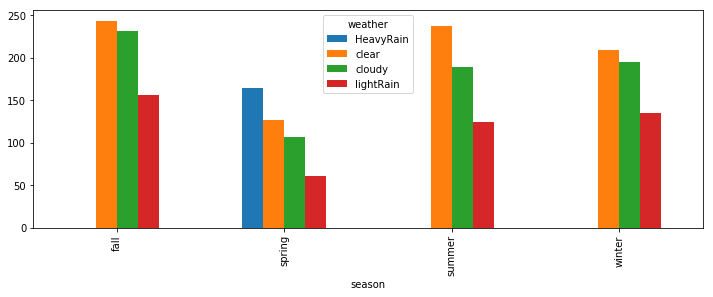

In [14]:
temp1 = train.pivot_table(values='count',index='season',columns='weather')
print(temp1)
temp1.plot(kind='bar',figsize=(12,4))

weather  HeavyRain      clear     cloudy  lightRain
season                                             
fall           NaN  54.972539  49.783113  32.924623
spring         6.0  17.649801  13.718881   3.526066
summer         NaN  53.128262  41.491525  20.589286
winter         NaN  33.532902  22.294919  13.666667


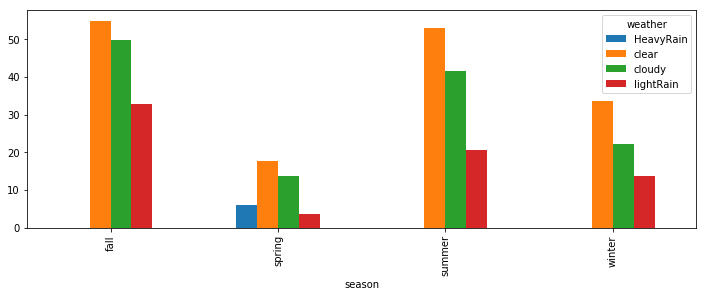

In [15]:
temp1 = train.pivot_table(values='casual',index='season',columns='weather')
print(temp1)
temp1.plot(kind='bar',figsize=(12,4))

1. Heavy rains occured only during spring
2. Bike demand during clear skys is comparable during fall and summer
3. during clear skys summar == fall > winter > spring
4. During cloudy skys fall > winter > summer > spring
5. During Light Rain  fall > winter > summer > spring
6. Demand of casual rides is very less during spring in comparison to other season

### <font color='#037367'>2. Effect of Humidity and wind speed</font>

Text(0.5,1,'For Heavy Rain Weather')

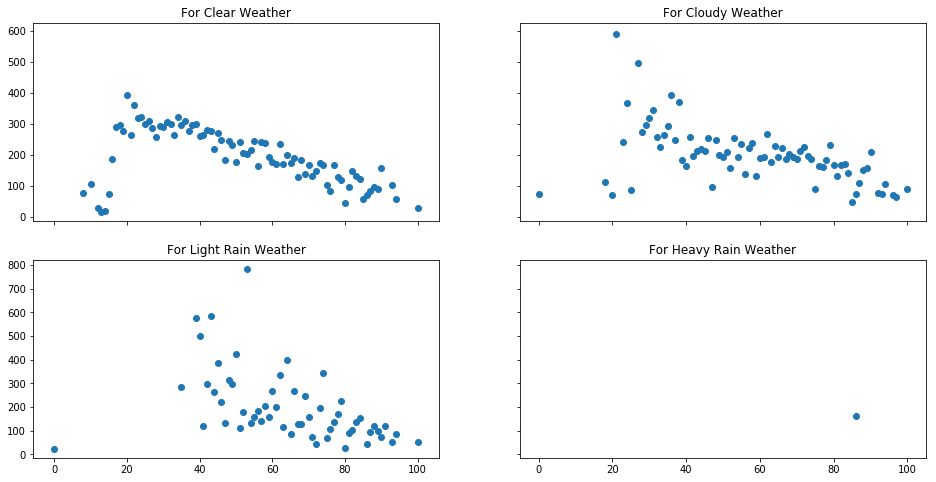

In [40]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(16,8))
queryFilter = (train['weather']=='clear')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax1.scatter(result['humidity'], result['count']) 
ax1.set_title('For Clear Weather')


queryFilter = (train['weather']=='cloudy')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax2.scatter(result['humidity'], result['count'])
ax2.set_title('For Cloudy Weather')

queryFilter = (train['weather']=='lightRain')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax3.scatter(result['humidity'], result['count'])
ax3.set_title('For Light Rain Weather')

queryFilter = (train['weather']=='HeavyRain')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax4.scatter(result['humidity'], result['count'])
ax4.set_title('For Heavy Rain Weather')

Text(0.5,1,'For Winter season')

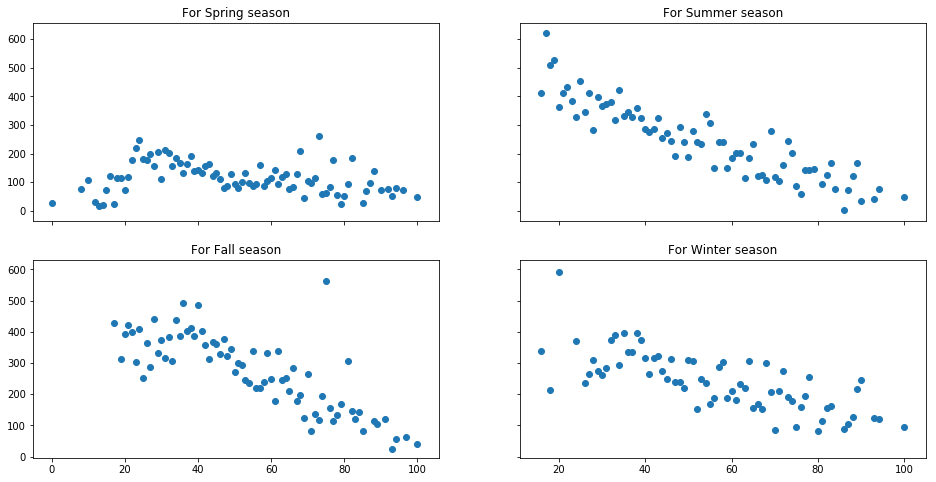

In [39]:
f, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, sharex='col', sharey='row',figsize=(16,8))
queryFilter = (train['season']=='spring')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax1.scatter(result['humidity'], result['count']) 
ax1.set_title('For Spring season')


queryFilter = (train['season']=='summer')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax2.scatter(result['humidity'], result['count'])
ax2.set_title('For Summer season')

queryFilter = (train['season']=='fall')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax3.scatter(result['humidity'], result['count'])
ax3.set_title('For Fall season')

queryFilter = (train['season']=='winter')
result = train[queryFilter].groupby(by='humidity').agg({'count':'mean','humidity':'first'})[['humidity','count']]
ax4.scatter(result['humidity'], result['count'])
ax4.set_title('For Winter season')

1. Generally with increase in humidity, the number of bike sharing decreases.
2. In Spring and winter season, humidity has no/little effect of bike demand
3. During Summer season when humidity is low, bike demand remains very high
4. There is an outlier where weather is light rain but humidity is 0
5. For Light rain weather bike demand remains very high when humidity is in between 40 to 60

In [42]:
### <font color='#037367'>3. Effect of Holiday and Working days</font>

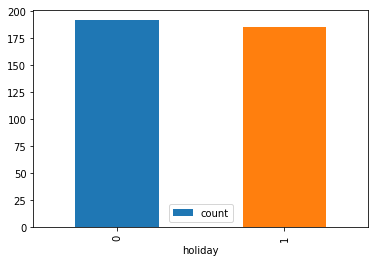

In [48]:
train.groupby(by='holiday').agg({'count':'mean','holiday':'first'}).plot(kind='bar',x='holiday',y='count')

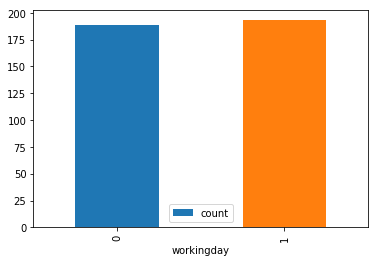

In [50]:
train.groupby(by='workingday').agg({'count':'mean','workingday':'first'}).plot(kind='bar',x='workingday',y='count')

In [51]:
train.pivot_table(values='count',index='holiday',columns='workingday')

workingday,0,1
holiday,,
0,188.765096,193.011873
1,185.877814,NaN


1. Generally on working days the demand for cycles is more
2. When there is holiday, than demand becomes less

# <font color='#00281F'>3. Data Cleaning and Missing value treatment</font> 

# <font color='#00281F'>4. Feature Engineering</font> 

# <font color='#00281F'>5. Predictive Modelling</font>  